In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
#Part 2 Now Let's make the ANN!
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing the ANN: 11 input nodes, rectifier for hidden layers
#sigmoid for output layers.
classifier = Sequential()
#Adding the input layer and the first hidden layer
#average numbers of used variables; 6.
#classifier.add(Dense(output_dim = 6, init = 'uniform', 
#                   activation = 'relu', input_dim = 11))
classifier.add(Dense(activation = 'relu', input_dim = 11,
                   units = 6, kernel_initializer = 'uniform'))
#Adding a second layer
classifier.add(Dense(activation = 'relu', units = 6, 
                     kernel_initializer = 'uniform'))
#Adding the output layer
classifier.add(Dense(activation = 'sigmoid', units = 1, 
                     kernel_initializer = 'uniform'))
#if we have more than 2 catagories for the output, we will
#need to choose the soft_max function

#Compile the neural network by applying stochastic gradient
#Descent on the neural network
classifier.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
classifier.fit(X_train, y_train, 
               batch_size = 10, 
               epochs = 100)

C:\Users\stealthyshampoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
7500/7500 [==============================] - 2s 246us/step - loss: 0.4835 - acc: 0.7964
Epoch 2/100
7500/7500 [==============================] - 1s 90us/step - loss: 0.4279 - acc: 0.7963
Epoch 3/100
7500/7500 [==============================] - 1s 86us/step - loss: 0.4228 - acc: 0.7980
Epoch 4/100
7500/7500 [==============================] - 1s 104us/step - loss: 0.4187 - acc: 0.8201
Epoch 5/100
7500/7500 [==============================] - 1s 86us/step - loss: 0.4168 - acc: 0.8259
Epoch 6/100
7500/7500 [==============================] - 1s 85us/step - loss: 0.4147 - acc: 0.8289
Epoch 7/100
7500/7500 [==============================] - 1s 89us/step - loss: 0.4132 - acc: 0.8300
Epoch 8/100
7500/7500 [==============================] - 1s 87us/step - loss: 0.4122 - acc: 0.8324
Epoch 9/100
7500/7500 [==============================] - 1s 96us/step - loss: 0.4112 - acc: 0.8319: 0s - loss: 0.4212 - 
Epoch 10/100
7500/7500 [==============================] - 1s 113us/step - loss: 0.410

7500/7500 [==============================] - 1s 99us/step - loss: 0.3945 - acc: 0.8352
Epoch 83/100
7500/7500 [==============================] - 1s 82us/step - loss: 0.3943 - acc: 0.8365
Epoch 84/100
7500/7500 [==============================] - 1s 78us/step - loss: 0.3942 - acc: 0.8359
Epoch 85/100
7500/7500 [==============================] - 1s 79us/step - loss: 0.3943 - acc: 0.8359
Epoch 86/100
7500/7500 [==============================] - 1s 89us/step - loss: 0.3946 - acc: 0.8375
Epoch 87/100
7500/7500 [==============================] - 1s 83us/step - loss: 0.3935 - acc: 0.8353
Epoch 88/100
7500/7500 [==============================] - 1s 96us/step - loss: 0.3947 - acc: 0.8353
Epoch 89/100
7500/7500 [==============================] - 1s 87us/step - loss: 0.3944 - acc: 0.8353
Epoch 90/100
7500/7500 [==============================] - 1s 116us/step - loss: 0.3943 - acc: 0.8351
Epoch 91/100
7500/7500 [==============================] - 1s 131us/step - loss: 0.3939 - acc: 0.8377
Epoch 92/10

In [6]:
#Part 3 making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

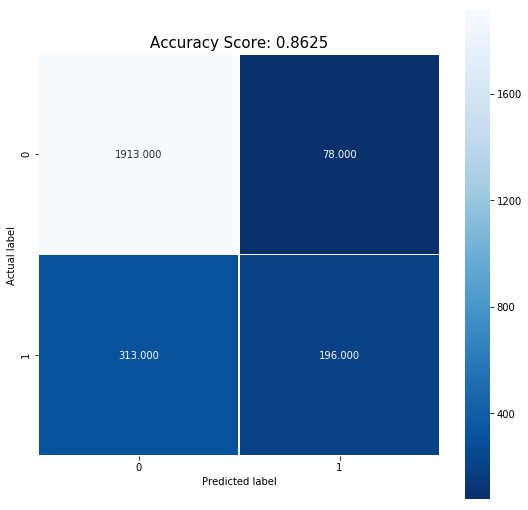

In [14]:
# Visualizing the confusion matrix.
import seaborn as sns
score = (1550 + 175)/2000
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**We have Achieved an accuracy of 86%**